In [42]:
import numpy as np
import keras
import matplotlib 
import matplotlib.pyplot as plt
from keras import models
from keras import layers

Loading data from imdb dataset

In [43]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

Data Preparation

In [44]:
#import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

#Encoding the labels
# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')



In [45]:
#Setting aside a validation set

x_val = x_train[:10000]

print(x_train.ndim)
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

2


Model Creation

In [46]:
#Our base model definition

from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [47]:
#Compiling our model
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])

In [48]:
#Training our model

history = model.fit(partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 45ms/step - loss: 0.5537 - accuracy: 0.7744 - val_loss: 0.4286 - val_accuracy: 0.8611
Epoch 2/20
30/30 [==============================] - 1s 36ms/step - loss: 0.3430 - accuracy: 0.8992 - val_loss: 0.3298 - val_accuracy: 0.8822
Epoch 3/20
30/30 [==============================] - 1s 36ms/step - loss: 0.2480 - accuracy: 0.9239 - val_loss: 0.2854 - val_accuracy: 0.8917
Epoch 4/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1946 - accuracy: 0.9386 - val_loss: 0.2727 - val_accuracy: 0.8931
Epoch 5/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1554 - accuracy: 0.9505 - val_loss: 0.2797 - val_accuracy: 0.8864
Epoch 6/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1275 - accuracy: 0.9603 - val_loss: 0.2946 - val_accuracy: 0.8828
Epoch 7/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1020 - accuracy: 0.9719 - val_loss: 0.2972 - val_accuracy: 0.8850
Epoch 8/20
30

In [49]:
#The history dictionary

history_dict = history.history
print(history_dict.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


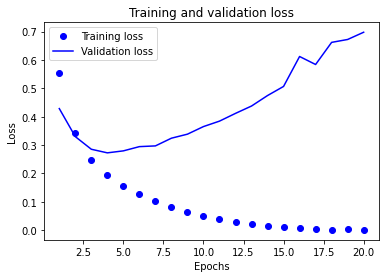

In [51]:
#Plotting the training and validation loss
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

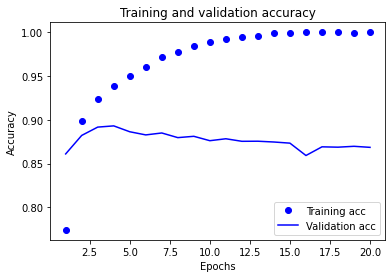

In [52]:
#Plotting the training and validation accuracy
plt.clf() # clear figure
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [53]:
#Re-training a model from scratch

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)


Epoch 1/4
49/49 [==============================] - 2s 29ms/step - loss: 0.5247 - accuracy: 0.8143
Epoch 2/4
49/49 [==============================] - 1s 29ms/step - loss: 0.3140 - accuracy: 0.9021
Epoch 3/4
49/49 [==============================] - 1s 29ms/step - loss: 0.2302 - accuracy: 0.9220
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.2809 - accuracy: 0.8888


In [54]:
print(results)

[0.280939519405365, 0.888759970664978]


1. You used two hidden layers. Try using one or three hidden layers, and see how doing so affects validation and test accuracy.

In [13]:
# 1. Using three hidden layers, and seeing how it affects validation and test accuracy.

model_1 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model_1.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

# Training our model

history_1 = model_1.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 45ms/step - loss: 0.5482 - accuracy: 0.7681 - val_loss: 0.4124 - val_accuracy: 0.8612
Epoch 2/20
30/30 [==============================] - 1s 34ms/step - loss: 0.3248 - accuracy: 0.9004 - val_loss: 0.3152 - val_accuracy: 0.8833
Epoch 3/20
30/30 [==============================] - 1s 33ms/step - loss: 0.2261 - accuracy: 0.9302 - val_loss: 0.3018 - val_accuracy: 0.8788
Epoch 4/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1706 - accuracy: 0.9443 - val_loss: 0.2879 - val_accuracy: 0.8851
Epoch 5/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1329 - accuracy: 0.9585 - val_loss: 0.3056 - val_accuracy: 0.8823
Epoch 6/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1086 - accuracy: 0.9666 - val_loss: 0.3113 - val_accuracy: 0.8868
Epoch 7/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0810 - accuracy: 0.9755 - val_loss: 0.3623 - val_accuracy: 0.8745
Epoch 8/20
30

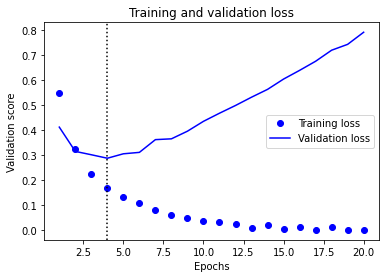

In [15]:
# Plotting the training and validation loss
history_dict_1 = history_1.history

loss = history_1.history['loss']
val_loss = history_1.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.axvline(x=4,color='k',linestyle=':')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.legend()

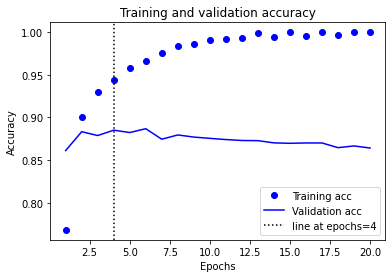

In [17]:
# Plotting the training and validation accuracy
plt.clf()
acc = history_dict_1["accuracy"]
val_acc = history_dict_1["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.axvline(x=4,label='line at epochs=4',color='k',linestyle=':')
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Validation loss seems to be minimum at the fourth epoch and then starts to increase. Similarly, accuracy seems to start decreasing from fourth epoch. This phenomenon is called "overfitting". In this case, to prevent overfitting, we could simply stop training after four epochs.So, we will train a new network from scratch for four epochs, then evaluate it on our test data.

In [20]:
model_1s = models.Sequential()
model_1s.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model_1s.add(layers.Dense(16, activation='relu'))
model_1s.add(layers.Dense(16, activation='relu'))
model_1s.add(layers.Dense(1, activation='sigmoid'))
model_1s.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])
model_1s.fit(x_train, y_train, epochs=4, batch_size=512)
results1 = model_1s.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 3s 29ms/step - loss: 0.4934 - accuracy: 0.7824
Epoch 2/4
49/49 [==============================] - 1s 29ms/step - loss: 0.2614 - accuracy: 0.9096
Epoch 3/4
49/49 [==============================] - 1s 29ms/step - loss: 0.1990 - accuracy: 0.9275
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.3069 - accuracy: 0.8803


In [21]:
print(results1)

[0.30690521001815796, 0.8803200125694275]


By using 3 hidden layers, we could see a very slight decrease in test accuracy compared to 2 hidden layers .

2.Try using layers with more hidden units or fewer hidden units: 32 units, 64 units, and so on.

In [35]:
model_2 = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_2.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [36]:
  history_2 = model_2.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 55ms/step - loss: 0.4793 - accuracy: 0.7972 - val_loss: 0.4273 - val_accuracy: 0.8087
Epoch 2/20
30/30 [==============================] - 1s 42ms/step - loss: 0.2581 - accuracy: 0.9078 - val_loss: 0.3907 - val_accuracy: 0.8316
Epoch 3/20
30/30 [==============================] - 1s 43ms/step - loss: 0.1965 - accuracy: 0.9279 - val_loss: 0.2784 - val_accuracy: 0.8893
Epoch 4/20
30/30 [==============================] - 1s 45ms/step - loss: 0.1442 - accuracy: 0.9491 - val_loss: 0.2996 - val_accuracy: 0.8837
Epoch 5/20
30/30 [==============================] - 1s 43ms/step - loss: 0.1268 - accuracy: 0.9555 - val_loss: 0.3423 - val_accuracy: 0.8731
Epoch 6/20
30/30 [==============================] - 1s 43ms/step - loss: 0.0923 - accuracy: 0.9699 - val_loss: 0.3236 - val_accuracy: 0.8840
Epoch 7/20
30/30 [==============================] - 1s 43ms/step - loss: 0.0747 - accuracy: 0.9755 - val_loss: 0.3818 - val_accuracy: 0.8748
Epoch 8/20
30

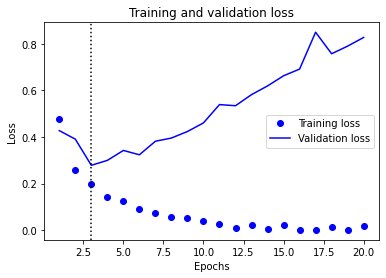

In [38]:
history_dict_2 = history_2.history
loss_values = history_dict_2["loss"]
val_loss_values = history_dict_2["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.axvline(x=3,color='k',linestyle=':')
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

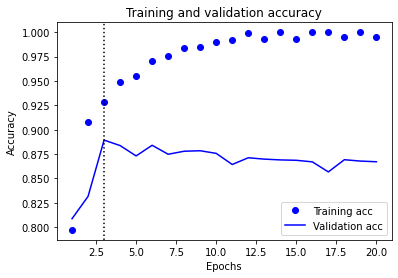

In [39]:
plt.clf()
acc = history_dict_2["accuracy"]
val_acc = history_dict_2["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.axvline(x=3,color='k',linestyle=':')
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Validation loss seems to be minimum at the Third epoch and then starts to increase. Similarly, accuracy seems to start decreasing from Third epoch. This phenomenon is called "overfitting". In this case, to prevent overfitting, we could simply stop training after three epochs.So, we will train a new network from scratch for three epochs, then evaluate it on our test data.

In [40]:
model_2s = models.Sequential()
model_2s.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model_2s.add(layers.Dense(64, activation='relu'))
model_2s.add(layers.Dense(1, activation='sigmoid'))
model_2s.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])
model_2s.fit(x_train, y_train, epochs=3, batch_size=512)
results2 = model_2s.evaluate(x_test, y_test)

Epoch 1/3
49/49 [==============================] - 3s 35ms/step - loss: 0.4297 - accuracy: 0.8156
Epoch 2/3
49/49 [==============================] - 2s 33ms/step - loss: 0.2422 - accuracy: 0.9112
Epoch 3/3
782/782 [==============================] - 2s 2ms/step - loss: 0.3021 - accuracy: 0.8796


In [41]:
print(results2)

[0.3021339774131775, 0.8796399831771851]


Having more hidden units allows the network to learn more complex representations, but it makes the network more computationally expensive and may lead to learning unwanted patterns i.e.overfitting. We could see overfitting occuring in our neural network which caused a slight decrease in test accuracy compared to the layers with less hidden units .

3. Try using the 'mse' loss function instead of 'binary_crossentropy'.



In [5]:
model_3 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_3.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])

In [6]:
# Training our model

history_3 = model_3.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 50ms/step - loss: 0.1621 - accuracy: 0.7971 - val_loss: 0.1121 - val_accuracy: 0.8774
Epoch 2/20
30/30 [==============================] - 1s 37ms/step - loss: 0.0869 - accuracy: 0.9041 - val_loss: 0.0940 - val_accuracy: 0.8826
Epoch 3/20
30/30 [==============================] - 1s 37ms/step - loss: 0.0624 - accuracy: 0.9314 - val_loss: 0.0865 - val_accuracy: 0.8847
Epoch 4/20
30/30 [==============================] - 1s 37ms/step - loss: 0.0494 - accuracy: 0.9454 - val_loss: 0.0841 - val_accuracy: 0.8852
Epoch 5/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0377 - accuracy: 0.9618 - val_loss: 0.0935 - val_accuracy: 0.8712
Epoch 6/20
30/30 [==============================] - 1s 37ms/step - loss: 0.0316 - accuracy: 0.9687 - val_loss: 0.0900 - val_accuracy: 0.8766
Epoch 7/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0252 - accuracy: 0.9769 - val_loss: 0.0929 - val_accuracy: 0.8739
Epoch 8/20
30

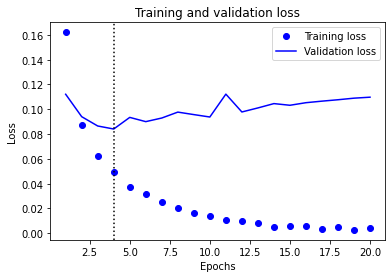

In [8]:
# Plotting the training and validation loss
history_dict_3 = history_3.history
loss_values = history_dict_3["loss"]
val_loss_values = history_dict_3["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.axvline(x=4,color='k',linestyle=':')
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

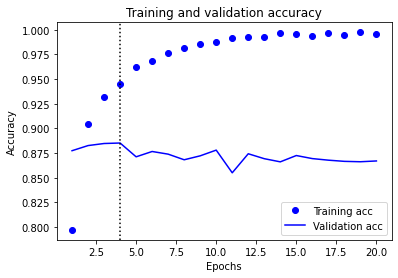

In [10]:
# Plotting the training and validation accuracy
plt.clf()
acc = history_dict_3["accuracy"]
val_acc = history_dict_3["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.axvline(x=4,color='k',linestyle=':')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Validation loss seems to be minimum at the fourth epoch and then starts to increase. Similarly, accuracy seems to start decreasing from fourth epoch. This phenomenon is called "overfitting". In this case, to prevent overfitting, we could simply stop training after four epochs.So, we will train a new network from scratch for four epochs, then evaluate it on our test data.

In [11]:
model_3s = models.Sequential()
model_3s.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model_3s.add(layers.Dense(16, activation='relu'))
model_3s.add(layers.Dense(1, activation='sigmoid'))
model_3s.compile(optimizer='rmsprop',
loss='mse',
metrics=['accuracy'])
model_3s.fit(x_train, y_train, epochs=4, batch_size=512)
results3 = model_3s.evaluate(x_test, y_test)


Epoch 1/4
49/49 [==============================] - 2s 37ms/step - loss: 0.1454 - accuracy: 0.8238
Epoch 2/4
49/49 [==============================] - 2s 44ms/step - loss: 0.0782 - accuracy: 0.9119
Epoch 3/4
49/49 [==============================] - 1s 29ms/step - loss: 0.0591 - accuracy: 0.9304
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.0885 - accuracy: 0.8798


In [12]:
print(results3)

[0.08853407949209213, 0.8797600269317627]


MSE is preferred loss function under the inference framework of maximum likelyhood if the distribution of the target variable is gaussian. It is generally preferred for regression problems. Whereas binary_crossentropy is preferred loss funtion for binary classification problems. By using MSE loss funtion we could see a slight decrease in accuracy when compared to binary_crossentropy loss funtion

4.Try using the tanh activation (an activation that was popular in the early days of neural networks) instead of 'relu'

In [13]:
model_4 = keras.Sequential([
    layers.Dense(16, activation="tanh"),
    layers.Dense(16, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
    ])
model_4.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])

In [14]:
history_4 = model_4.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 4s 101ms/step - loss: 0.1602 - accuracy: 0.7983 - val_loss: 0.1130 - val_accuracy: 0.8630
Epoch 2/20
30/30 [==============================] - 1s 37ms/step - loss: 0.0811 - accuracy: 0.9073 - val_loss: 0.0905 - val_accuracy: 0.8792
Epoch 3/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0556 - accuracy: 0.9347 - val_loss: 0.0812 - val_accuracy: 0.8913
Epoch 4/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0416 - accuracy: 0.9516 - val_loss: 0.0833 - val_accuracy: 0.8879
Epoch 5/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0309 - accuracy: 0.9657 - val_loss: 0.0889 - val_accuracy: 0.8832
Epoch 6/20
30/30 [==============================] - 1s 37ms/step - loss: 0.0242 - accuracy: 0.9736 - val_loss: 0.0926 - val_accuracy: 0.8781
Epoch 7/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0197 - accuracy: 0.9787 - val_loss: 0.0945 - val_accuracy: 0.8805
Epoch 8/20
3

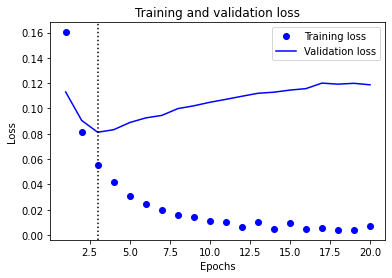

In [16]:
history_dict_4 = history_4.history
loss_values = history_dict_4["loss"]
val_loss_values = history_dict_4["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.axvline(x=3,color='k',linestyle=':')
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

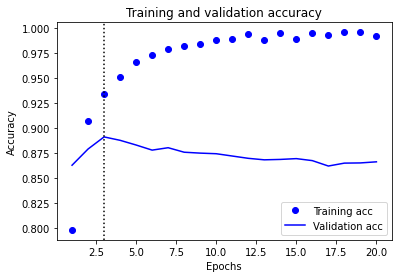

In [17]:
# Plotting the training and validation accuracy
plt.clf()
acc = history_dict_4["accuracy"]
val_acc = history_dict_4["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.axvline(x=3,color='k',linestyle=':')
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Validation loss seems to be minimum at the third epoch and then starts to increase. Similarly, accuracy seems to start decreasing from third epoch. This phenomenon is called "overfitting". In this case, to prevent overfitting, we could simply stop training after three epochs.So, we will train a new network from scratch for three epochs, then evaluate it on our test data.

In [18]:
model_4s = models.Sequential()
model_4s.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model_4s.add(layers.Dense(16, activation='tanh'))
model_4s.add(layers.Dense(1, activation='sigmoid'))
model_4s.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])
model_4s.fit(x_train, y_train, epochs=3, batch_size=512)
results4 = model_4s.evaluate(x_test, y_test)

Epoch 1/3
49/49 [==============================] - 2s 30ms/step - loss: 0.4260 - accuracy: 0.8282
Epoch 2/3
49/49 [==============================] - 1s 29ms/step - loss: 0.2358 - accuracy: 0.9130
Epoch 3/3
782/782 [==============================] - 2s 2ms/step - loss: 0.3291 - accuracy: 0.8684


In [19]:
print(results4)

[0.3291013240814209, 0.868399977684021]


By using tanh function we could see some loss in accuracy

5.Use any technique we studied in class, and these include regularization, dropout, etc., to get your model to perform better on validation.


In [84]:
#Dropout 25%
from keras import models
from keras import layers
model_5D = models.Sequential()
model_5D.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model_5D.add(layers.Dropout(0.25))
model_5D.add(layers.Dense(16, activation='relu'))
model_5D.add(layers.Dropout(0.25))
model_5D.add(layers.Dense(1, activation='sigmoid'))

In [85]:
model_5D.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [86]:
history_5D = model_5D.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 54ms/step - loss: 0.5684 - accuracy: 0.7296 - val_loss: 0.4261 - val_accuracy: 0.8527
Epoch 2/20
30/30 [==============================] - 1s 37ms/step - loss: 0.3971 - accuracy: 0.8547 - val_loss: 0.3296 - val_accuracy: 0.8823
Epoch 3/20
30/30 [==============================] - 1s 37ms/step - loss: 0.3097 - accuracy: 0.8894 - val_loss: 0.2900 - val_accuracy: 0.8915
Epoch 4/20
30/30 [==============================] - 1s 36ms/step - loss: 0.2468 - accuracy: 0.9167 - val_loss: 0.2720 - val_accuracy: 0.8936
Epoch 5/20
30/30 [==============================] - 1s 38ms/step - loss: 0.2059 - accuracy: 0.9305 - val_loss: 0.2685 - val_accuracy: 0.8917
Epoch 6/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1745 - accuracy: 0.9440 - val_loss: 0.2882 - val_accuracy: 0.8847
Epoch 7/20
30/30 [==============================] - 1s 41ms/step - loss: 0.1431 - accuracy: 0.9531 - val_loss: 0.2923 - val_accuracy: 0.8895
Epoch 8/20
30

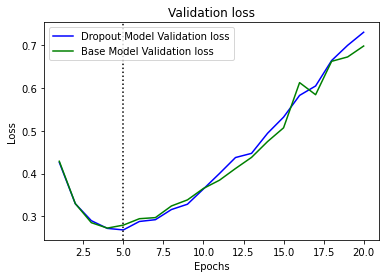

In [88]:
# Plotting the training and validation loss
history_dict_5D = history_5D.history
#loss_values = history_dict_5D["loss"]
val_loss_values = history_dict_5D["val_loss"]
epochs = range(1, len(loss_values) + 1)
#plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Dropout Model Validation loss")
plt.plot(epochs, history_dict["val_loss"], "g", label="Base Model Validation loss")
plt.axvline(x=5,color='k',linestyle=':')
plt.title("Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

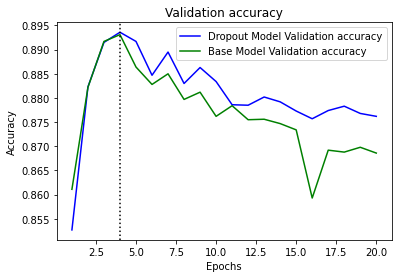

In [89]:
# Plotting the training and validation accuracy
plt.clf()
#acc = history_dict_5D["accuracy"]
val_acc = history_dict_5D["val_accuracy"]
#plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Dropout Model Validation accuracy")
plt.plot(epochs, history_dict["val_accuracy"], "g", label="Base Model Validation accuracy")
plt.axvline(x=4,color='k',linestyle=':')
plt.title("Validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

By using dropout, we are introducing random noise in the output values of a layer by dropping out some neurons randomly. This will help in preventing the network from memorising insignificant patterns from certain neurons resulting in preventing overfitting and increasing performance of the network.
